# Modelo Logístico 

El modelo logístico viene definido por la ecuación: 

$$	
\begin{cases}
\frac{dV}{dt}= aV(1-\frac{V}{K})\\
V(t=0) = 1mm^{3}
\end{cases}
$$

Donde: 
    - K es la capacidad de carga
    - a es la tasa de crecimiento intrínseca de la especie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import sympy as sp

In [2]:
#Definicion de las variables
t, V0, a, C1, A=sp.symbols('t V0 a C1 A')
K = sp.symbols('K', positive = True)
V = sp.Function('V')

Obsérvese que ya hemos introducido $C_1$ como símbolo. Es el nombre que el sistema da a la constate de integración

In [3]:
#Modelo
m_log = sp.Eq(V(t).diff(), a*V(t)*(1-(V(t)/K)))
m_log

Eq(Derivative(V(t), t), a*(1 - V(t)/K)*V(t))

In [4]:
#Solución modelo
m_log2 = sp.dsolve(m_log)
m_log2

Eq(V(t), K*exp(C1*K + a*t)/(exp(C1*K + a*t) - 1))

A continuación expresamos la solución en función de la condición inicial $V_0$ en $t=0$

In [5]:
m_log3 = sp.Eq(V(t).subs(t,0).subs(V(0), V0), m_log2.rhs.subs(t,0))
m_log3

Eq(V0, K*exp(C1*K)/(exp(C1*K) - 1))

Resolvemos la anterior ecuación para obtener la constante $c_1$ en función de la condición inicial $V_0$ y de $K$

In [6]:
#Calculamos el valor de la constante C1
cte = sp.solve(m_log3,C1)
cte

[log(-V0/(K - V0))/K]

Solución general en función de la condición y los parámetros del modelo: $a$ y $K$

In [7]:
solucion_log = m_log2.subs(C1,cte[0])
solucion_log

Eq(V(t), -K*V0*exp(a*t)/((K - V0)*(-V0*exp(a*t)/(K - V0) - 1)))

In [8]:
sol_log_simp = sp.simplify(solucion_log)
sol_log_simp

Eq(V(t), K*V0*exp(a*t)/(K + V0*exp(a*t) - V0))

#### Ecuación logística

- Ecuación:

\begin{cases}
\frac{dV}{dt}= aV(1-\frac{V}{K})\\
V(t=0) = 1mm^{3}
\end{cases}

- Solución:
$$
V(t)=\frac{KV_0e^{at}}{K+V_0e^{at}-V_0}
$$

La solución obtenida se corresponde a la solucion explícita del modelo cuando $v=1$. 

Solución explícita:
$$
V(t)=\frac{KV_0}{(V_0^{v}+(K^{v}-V_0^{v})e^{-avt})^{\frac{1}{v}}}
$$

#### Estudio de los puntos de equilibrio

In [9]:
m_log.rhs

a*(1 - V(t)/K)*V(t)

In [10]:
p_crit = sp.solve(m_log.rhs, V(t))
p_crit

[0, K]

In [11]:
p_crit1 = p_crit[0]
p_crit2 = p_crit[1]
p_crit1, p_crit2

(0, K)

Los puntos críticos de la ecuación logística son:
- 0: punto asintóticamente inestable. El crecimiento puede darse si la posblación inicial es distinta de cero. 
- K: punto asintoticamente estable. Las trayectorias tienden a este cuando el tiempo tiende a $\infty$

A continuacion estudiamos la estabilidad de los puntos críticos del sistema

In [12]:
pendiente_0 = m_log.rhs.diff(V(t)).subs(V(t), p_crit[0])
#sustituyo p por el segundo indice de la lista
pendiente_K = m_log.rhs.diff(V(t)).subs(V(t), p_crit[1])

pendiente_0, pendiente_K

(a, -a)

El comportamiento del modelo no depende del valor de la población máxima $K.$ Solo depende del signo de la tasa intrísca de crecimiento p.c. $a.$ 

Obsérvese que la estabilidad de las soluciones de equilibrio cambia con el signo de $a.$

#### Representación gráfica de las soluciones del Modelo Logístico


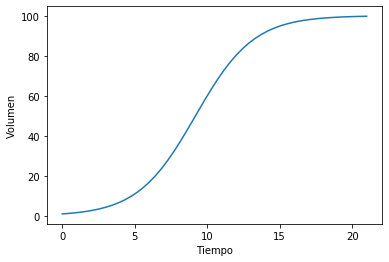

In [24]:
tiempo = np.linspace(0,21,50)
a = 0.5
K = 100
V0 = 1

graf_log = sp.lambdify(t, (K*V0*sp.exp(a*t))/(K+(V0*sp.exp(a*t))-V0))

plt.plot(tiempo, graf_log(tiempo))
plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.savefig('modelo_logistico.png')
plt.show()

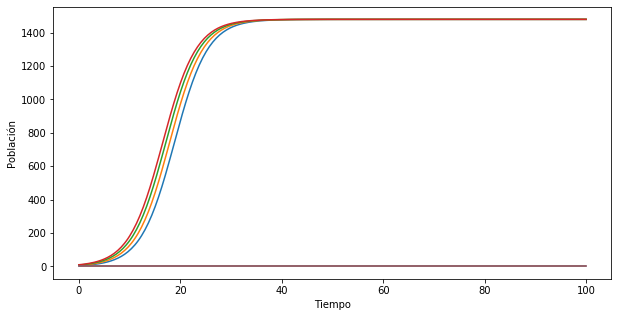

In [14]:
t, V0, a, K =sp.symbols('t V0 a K')

# Alargamos la figura para que se vean mejor de las curvas
plt.figure(figsize =(10,5))

graf_log = (K*V0*sp.exp(a*t))/(K+(V0*sp.exp(a*t))-V0)


# Generamos los valores de la variable independiente
t1 = np.linspace(0, 100, 300)

# Construimos varios bucles para representar las soluciones pedidas
# Para representar las soluciones constantes no se puede utilizar lambdify 
# Primero representamos las soluciones entre 0 y 250 
for ini in np.linspace(5, 10, 4):
    solp_l = sp.lambdify(t, graf_log.subs({a:0.302, K:1479, V0:ini}))
    plt.plot(t1, solp_l(t1))

# Acabamos representando las soluciones constantes
for ini in [0, 1]:
    plt.plot(t1, ini*np.ones(300))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Población')

# Mostramos la figura
plt.show()

# Modelo logístico generalizado
Ecuación del modelo:
$$	
\begin{cases}
\frac{dV}{dt}= aV(1-(\frac{V}{K})^{b})\\
V(t=0) = 1mm^{3}
\end{cases}
$$


In [15]:
import math

In [16]:
t, V0, a, C1 = sp.symbols('t V0 a C1')
K, b = sp.symbols('K b', positive=True)
V=sp.Function('V')

In [17]:
log_general = sp.Eq(V(t).diff(), a*V(t)*(1-(V(t)/K)**b))
log_general

Eq(Derivative(V(t), t), a*(1 - (V(t)/K)**b)*V(t))

In [18]:
sol_log_general = sp.dsolve(log_general)
sol_log_general

Eq(V(t), K*(-exp(b*(C1*K**b + a*t))/(1 - exp(b*(C1*K**b + a*t))))**(1/b))

A continuación expresamos la solución en función de la condición inicial $V_0$ en $t=0$

In [19]:
log_gen = sp.Eq(V(t).subs(t,0).subs(V(0), V0), sol_log_general.rhs.subs(t,0))
log_gen

Eq(V0, K*(-exp(C1*K**b*b)/(1 - exp(C1*K**b*b)))**(1/b))

Resolvemos la anterior ecuación para obtener la constante $c_1$ en función de la condición inicial $V_0$ y de $K$

In [20]:
#Calculamos el valor de la constante C1
cte_general = sp.solve(log_gen,C1)
cte_general

[K**(-b)*log(V0**b/(-K**b + V0**b))/b]

In [21]:
solucion_log_generalizada = sol_log_general.subs(C1,cte_general)
solucion_log_generalizada

Eq(V(t), K*(-exp(b*(C1*K**b + a*t))/(1 - exp(b*(C1*K**b + a*t))))**(1/b))

#### Ecuación logística generalizada

    - Ecuación:
	
\begin{cases}
\frac{dV}{dt}= aV(1-(\frac{V}{K})^{b})\\
V(t=0) = 1mm^{3}
\end{cases}

    - Solución:
$$
V(t)=K(-\frac{e^{b(C_1K^{b}+at)}}{1-e^{b(C_1K^{b}+at)}})^{\frac{1}{b}}
$$

Python no consigue llegar a la misma solución.  

Solución explícita:
$$
V(t)=\frac{V_0K}{(V_0^{v}+(K^{v}-V_0^{v})e^{-avt})^{\frac{1}{v}}}
$$


In [22]:
log_general.rhs

a*(1 - (V(t)/K)**b)*V(t)

In [23]:
p_crit_general = sp.solve(log_general.rhs, V(t))
p_crit_general

[0, K]

Como vemos los puntos críticos son idénticos para el Modelo logístico y el Modelo logístico generalizado. Al no obtenerse un cambio de signo en los puntos críticos, el comportamiento es idéntico en ambos modelos. 